<a href="https://colab.research.google.com/github/Jlauf-MBAPMP/NewGitTest/blob/master/Linear_Models_Lab_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

This first part imports the necessary libraries we'll use throughout the tutorial. These libraries help us create data, build models, and visualize results.

In [1]:
# Linear Models Tutorial

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_classification, make_regression
from ipywidgets import interactive
%matplotlib inline

#Linear Regression

Linear regression predicts a continuous value (housing price, temperature, etc.) from a set of feature values by giving each feature a different amout of positive or negative votes toward the eventual value. So a housing price estimator might consist of two features: number of bedrooms and number of bathrooms. The function might look like this:

y = 200000*x1 + 200000*x2 + 200000 + noise    (where x1 is num_of_bedrooms and x2 is num_of_bathrooms)

If you were buying a house with no bedrooms or bathrooms then the predicted price is 200000. Because the weights associated with x1 is positive it means for every unit of x1 it is going to push the predicted house price in the positive direction. You could have a feature like num_of_ghosts in the house and it would have a weight of -100000 where for every ghost living in the house we would deduct 100k from the predicted price of the house. Adding everything up gives you your prediction for the housing price.

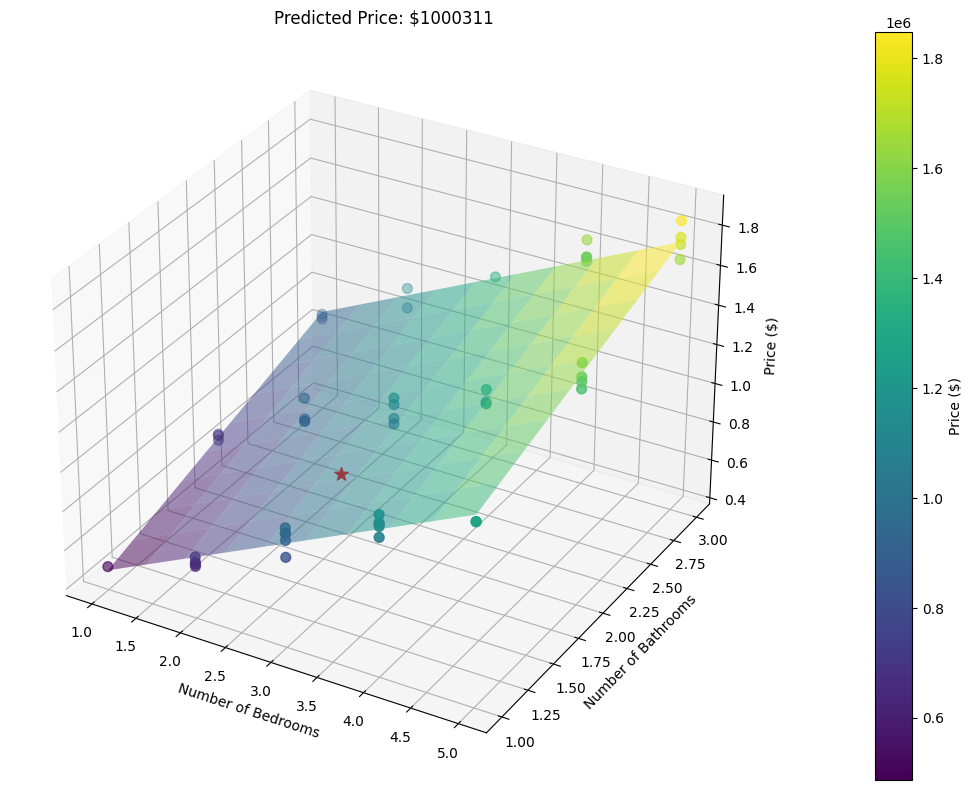

Predicted price for 3 bedrooms and 1.5 bathrooms: $1000311


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interactive_output, FloatSlider, IntSlider, Button, VBox, HBox
from IPython.display import display, clear_output
%matplotlib inline

class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        X_bias = np.c_[X, np.ones(X.shape[0])]
        coeffs = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
        self.w = coeffs[:-1]
        self.b = coeffs[-1]

    def predict(self, X):
        return X @ self.w + self.b

# Generate sample data
np.random.seed(42)
bedrooms = np.random.randint(1, 6, 50)
bathrooms = np.random.randint(1, 4, 50)
X = np.column_stack((bedrooms, bathrooms))

# Generate prices with weights close to 200,000 for both features
noise = np.random.normal(0, 50000, 50)
y = 200000 * bedrooms + 200000 * bathrooms + 100000 + noise

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

print(f"Trained weights: Bedrooms: ${model.w[0]:.0f}, Bathrooms: ${model.w[1]:.0f}")
print(f"Trained bias: ${model.b:.0f}")

new_points = []

def update_plot(X, y, model, title, new_point=None):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot training data
    scatter = ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', s=50)

    # Plot prediction plane
    x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
    y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
    X1, X2 = np.meshgrid(x_range, y_range)
    Z = model.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
    ax.plot_surface(X1, X2, Z, alpha=0.5, cmap='viridis')

    if new_point is not None:
        ax.scatter([new_point[0]], [new_point[1]], [model.predict(new_point.reshape(1, -1))],
                   color='red', s=100, marker='*')

    ax.set_xlabel('Number of Bedrooms')
    ax.set_ylabel('Number of Bathrooms')
    ax.set_zlabel('Price ($)')
    ax.set_title(title)

    fig.colorbar(scatter, label='Price ($)', pad=0.1)

    plt.tight_layout()
    plt.show()

# Plot initial state
update_plot(X, y, model, "Housing Price Predictor")

def add_point(bedrooms, bathrooms):
    global new_points, model, X, y
    new_point = np.array([bedrooms, bathrooms])
    predicted_price = model.predict(new_point.reshape(1, -1))[0]
    new_points.append(new_point)
    clear_output(wait=True)
    update_plot(X, y, model, f"Predicted Price: ${predicted_price:.0f}", new_point)
    display(ui)
    print(f"Predicted price for {bedrooms} bedrooms and {bathrooms} bathrooms: ${predicted_price:.0f}")

bedrooms_slider = IntSlider(min=1, max=6, step=1, description='Bedrooms')
bathrooms_slider = FloatSlider(min=1, max=4, step=0.5, description='Bathrooms')
add_button = Button(description="Predict Price")

add_button.on_click(lambda b: add_point(bedrooms_slider.value, bathrooms_slider.value))

ui = VBox([HBox([bedrooms_slider, bathrooms_slider]), add_button])

print("Use the sliders to set the number of bedrooms and bathrooms, then click 'Predict Price'.")
display(ui)

#Linear Classification
Linear classification is a method used to separate data into different categories using a straight line (in 2D) or a plane (in higher dimensions).

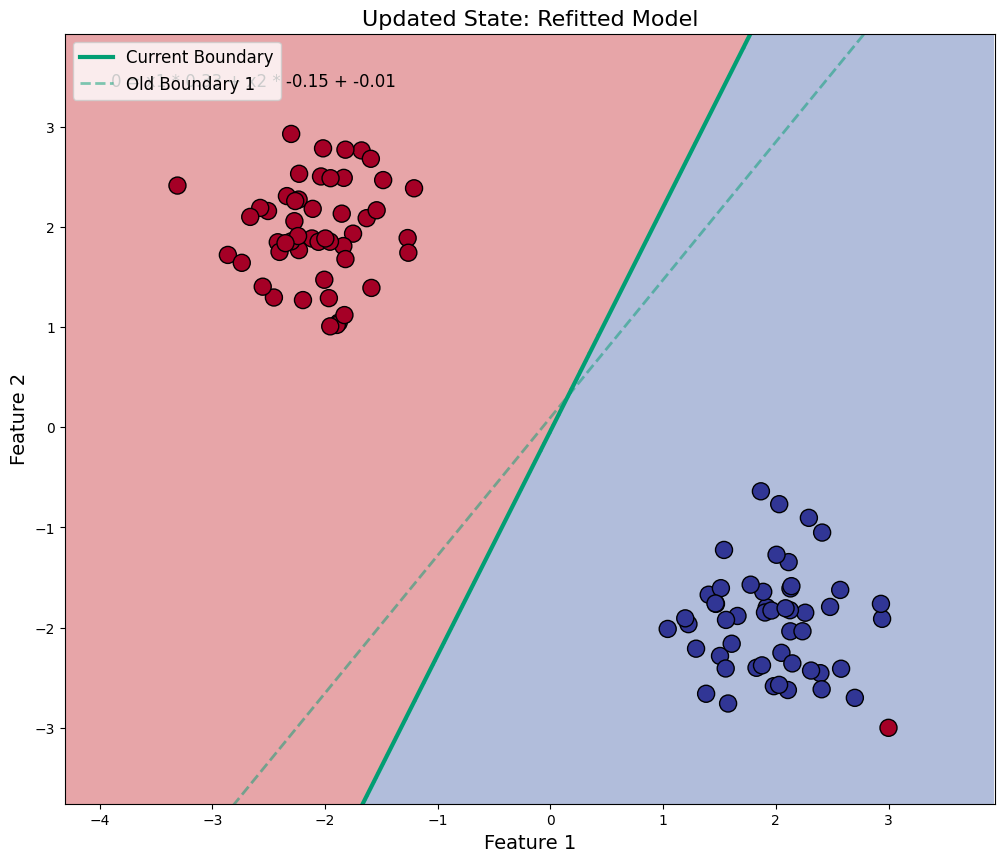

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interactive_output, FloatSlider, IntSlider, Button, VBox, HBox
from IPython.display import display, clear_output
%matplotlib inline

from google.colab import output
output.enable_custom_widget_manager()

# Use a colorblind-friendly palette
import seaborn as sns
colors = sns.color_palette("colorblind")

class LinearClassifier:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        X_bias = np.c_[X, np.ones(X.shape[0])]
        self.w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
        self.b = self.w[-1]
        self.w = self.w[:-1]

    def predict(self, X):
        return np.sign(X @ self.w + self.b)

# Generate sample data with clear separation
np.random.seed(42)
X1 = np.random.randn(50, 2) * 0.5 + np.array([-2, 2])
X2 = np.random.randn(50, 2) * 0.5 + np.array([2, -2])
X_full = np.vstack((X1, X2))
y_full = np.hstack((np.ones(50) * -1, np.ones(50)))

# Create a version with missing middle section
mask = (X_full[:, 0] < 0.5) & (X_full[:, 0] > -0.5)
X = X_full[~mask]
y = y_full[~mask]

# Train linear classifier on data with missing middle section
clf = LinearClassifier()
clf.fit(X, y)

new_points = []
old_boundaries = []

# Set fixed plot limits
x_min, x_max = X_full[:, 0].min() - 1, X_full[:, 0].max() + 1
y_min, y_max = X_full[:, 1].min() - 1, X_full[:, 1].max() + 1

def update_plot(X, y, model, title, show_full_data=False, new_points=None):
    global old_boundaries, x_min, x_max, y_min, y_max
    plt.figure(figsize=(12, 10))

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    if show_full_data:
        plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, cmap=plt.cm.RdYlBu,
                    edgecolor='black', alpha=0.2, s=100)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                edgecolor='black', s=150)

    if new_points:
        new_points_array = np.array(new_points)
        plt.scatter(new_points_array[:, 0], new_points_array[:, 1],
                    c=new_points_array[:, 2], cmap=plt.cm.RdYlBu,
                    edgecolor='black', s=200, marker='*')

    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.title(title, fontsize=16)

    # Plot the learned decision boundary line
    w = model.w
    b = model.b
    x_boundary = np.array([x_min, x_max])
    y_boundary = -(w[0] * x_boundary + b) / w[1]
    plt.plot(x_boundary, y_boundary, color=colors[2], linewidth=3, label='Current Boundary')

    # Plot old decision boundaries
    for i, (old_w, old_b) in enumerate(old_boundaries):
        y_old_boundary = -(old_w[0] * x_boundary + old_b) / old_w[1]
        plt.plot(x_boundary, y_old_boundary, color=colors[2], linestyle='--',
                 linewidth=2, alpha=0.5, label=f'Old Boundary {i+1}')

    # Plot the "true" decision boundary
    #plt.axvline(x=0, color=colors[3], linestyle='--', linewidth=3, label='True Boundary')

    plt.legend(fontsize=12)
    plt.text(0.05, 0.95, f'0 = x1 * {w[0]:.2f} + x2 * {w[1]:.2f} + {b:.2f}',
             transform=plt.gca().transAxes, verticalalignment='top', fontsize=12)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()

# Plot initial state with missing data
update_plot(X, y, clf, "Initial State: Linear Classification")

def add_point(x1, x2, label):
    global new_points, clf, X, y
    new_points.append([x1, x2, -1 if label == 0 else 1])  # Convert label to -1 or 1
    clear_output(wait=True)
    update_plot(X, y, clf, "Updated State: Added Training Data",
                show_full_data=True, new_points=new_points)
    display(ui)

def refit_model(b):
    global X, y, clf, new_points, old_boundaries
    if new_points:
        old_boundaries.append((clf.w, clf.b))
        X_new = np.vstack([X, np.array(new_points)[:, :2]])
        y_new = np.hstack([y, np.array(new_points)[:, 2]])
        clf.fit(X_new, y_new)
        X, y = X_new, y_new
        clear_output(wait=True)
        update_plot(X, y, clf, "Updated State: Refitted Model", show_full_data=True)
        display(ui)
        new_points = []

x1_slider = FloatSlider(min=-4, max=4, step=0.1, description='x1')
x2_slider = FloatSlider(min=-4, max=4, step=0.1, description='x2')
label_slider = IntSlider(min=0, max=1, step=1, description='Label')
add_button = Button(description="Add Point")
refit_button = Button(description="Refit Model")

add_button.on_click(lambda b: add_point(x1_slider.value, x2_slider.value, label_slider.value))
refit_button.on_click(refit_model)

ui = VBox([HBox([x1_slider, x2_slider, label_slider]), HBox([add_button, refit_button])])

print("Use the sliders to set coordinates and label, then click 'Add Point' to add points.")
print("Click 'Refit Model' to update the decision boundary with the new points.")
display(ui)

Add points to the chart above [red (class 0) and blue (class 1) labels] to see how the decision boundary changes (solid green line). Hit the "Refit Model" button to see how the decision boundary changes after adding points.

#Adversarial Examples with Linear Models

Adversarial Examples are input points given to a model which produce predictions which are counter to what is expected by a human. The "True Boundary" identifies the feature values that a human would use to separate the two classes. In the next exericise I want you to add points to the chart where you think the inputs could serve as adversarial examples.

##Hint: The points you add will be the opposite of the original decision boundary

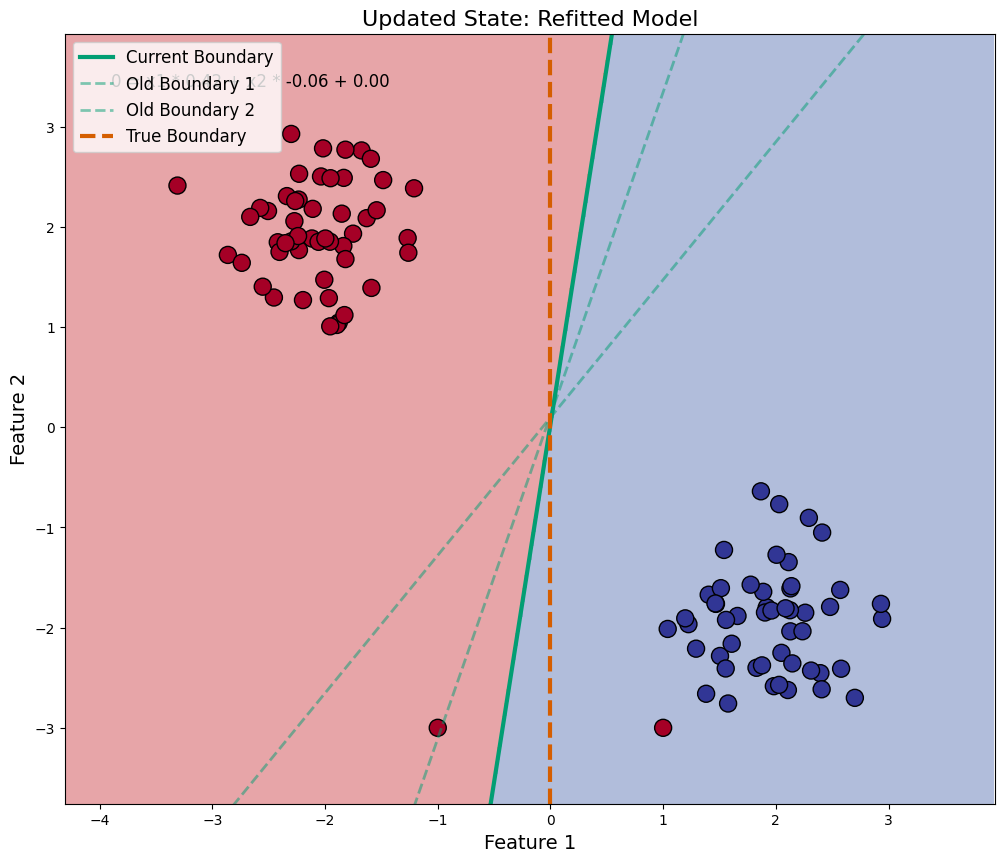

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interactive_output, FloatSlider, IntSlider, Button, VBox, HBox
from IPython.display import display, clear_output
%matplotlib inline

# Use a colorblind-friendly palette
import seaborn as sns
colors = sns.color_palette("colorblind")

class LinearClassifier:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        X_bias = np.c_[X, np.ones(X.shape[0])]
        self.w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
        self.b = self.w[-1]
        self.w = self.w[:-1]

    def predict(self, X):
        return np.sign(X @ self.w + self.b)

# Generate sample data with clear separation
np.random.seed(42)
X1 = np.random.randn(50, 2) * 0.5 + np.array([-2, 2])
X2 = np.random.randn(50, 2) * 0.5 + np.array([2, -2])
X_full = np.vstack((X1, X2))
y_full = np.hstack((np.ones(50) * -1, np.ones(50)))

# Create a version with missing middle section
mask = (X_full[:, 0] < 0.5) & (X_full[:, 0] > -0.5)
X = X_full[~mask]
y = y_full[~mask]

# Train linear classifier on data with missing middle section
clf = LinearClassifier()
clf.fit(X, y)

new_points = []
old_boundaries = []

# Set fixed plot limits
x_min, x_max = X_full[:, 0].min() - 1, X_full[:, 0].max() + 1
y_min, y_max = X_full[:, 1].min() - 1, X_full[:, 1].max() + 1

def update_plot(X, y, model, title, show_full_data=False, new_points=None):
    global old_boundaries, x_min, x_max, y_min, y_max
    plt.figure(figsize=(12, 10))

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    if show_full_data:
        plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, cmap=plt.cm.RdYlBu,
                    edgecolor='black', alpha=0.2, s=100)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                edgecolor='black', s=150)

    if new_points:
        new_points_array = np.array(new_points)
        plt.scatter(new_points_array[:, 0], new_points_array[:, 1],
                    c=new_points_array[:, 2], cmap=plt.cm.RdYlBu,
                    edgecolor='black', s=200, marker='*')

    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.title(title, fontsize=16)

    # Plot the learned decision boundary line
    w = model.w
    b = model.b
    x_boundary = np.array([x_min, x_max])
    y_boundary = -(w[0] * x_boundary + b) / w[1]
    plt.plot(x_boundary, y_boundary, color=colors[2], linewidth=3, label='Current Boundary')

    # Plot old decision boundaries
    for i, (old_w, old_b) in enumerate(old_boundaries):
        y_old_boundary = -(old_w[0] * x_boundary + old_b) / old_w[1]
        plt.plot(x_boundary, y_old_boundary, color=colors[2], linestyle='--',
                 linewidth=2, alpha=0.5, label=f'Old Boundary {i+1}')

    # Plot the "true" decision boundary
    plt.axvline(x=0, color=colors[3], linestyle='--', linewidth=3, label='True Boundary')

    plt.legend(fontsize=12)
    plt.text(0.05, 0.95, f'0 = x1 * {w[0]:.2f} + x2 * {w[1]:.2f} + {b:.2f}',
             transform=plt.gca().transAxes, verticalalignment='top', fontsize=12)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()

# Plot initial state with missing data
update_plot(X, y, clf, "Where would you add Adversarial Examples")

def add_point(x1, x2, label):
    global new_points, clf, X, y
    new_points.append([x1, x2, -1 if label == 0 else 1])  # Convert label to -1 or 1
    clear_output(wait=True)
    update_plot(X, y, clf, "Updated State: Added Training Data",
                show_full_data=True, new_points=new_points)
    display(ui)

def refit_model(b):
    global X, y, clf, new_points, old_boundaries
    if new_points:
        old_boundaries.append((clf.w, clf.b))
        X_new = np.vstack([X, np.array(new_points)[:, :2]])
        y_new = np.hstack([y, np.array(new_points)[:, 2]])
        clf.fit(X_new, y_new)
        X, y = X_new, y_new
        clear_output(wait=True)
        update_plot(X, y, clf, "Updated State: Refitted Model", show_full_data=True)
        display(ui)
        new_points = []

x1_slider = FloatSlider(min=-4, max=4, step=0.1, description='x1')
x2_slider = FloatSlider(min=-4, max=4, step=0.1, description='x2')
label_slider = IntSlider(min=0, max=1, step=1, description='Label')
add_button = Button(description="Add Point")
refit_button = Button(description="Refit Model")

add_button.on_click(lambda b: add_point(x1_slider.value, x2_slider.value, label_slider.value))
refit_button.on_click(refit_model)

ui = VBox([HBox([x1_slider, x2_slider, label_slider]), HBox([add_button, refit_button])])

print("Use the sliders to set coordinates and label, then click 'Add Point' to add points.")
print("Click 'Refit Model' to update the decision boundary with the new points.")
display(ui)

Remember that Adversarial Examples occur when the input feature values cause the predictions of the models to not match the actual label that the input values represent (ie picture of a cat with the prediction as guacomole)

#Data Poisoning

With Data Poisoning an attacker provides training data to the model to change the decision boundary to their desired orientation.

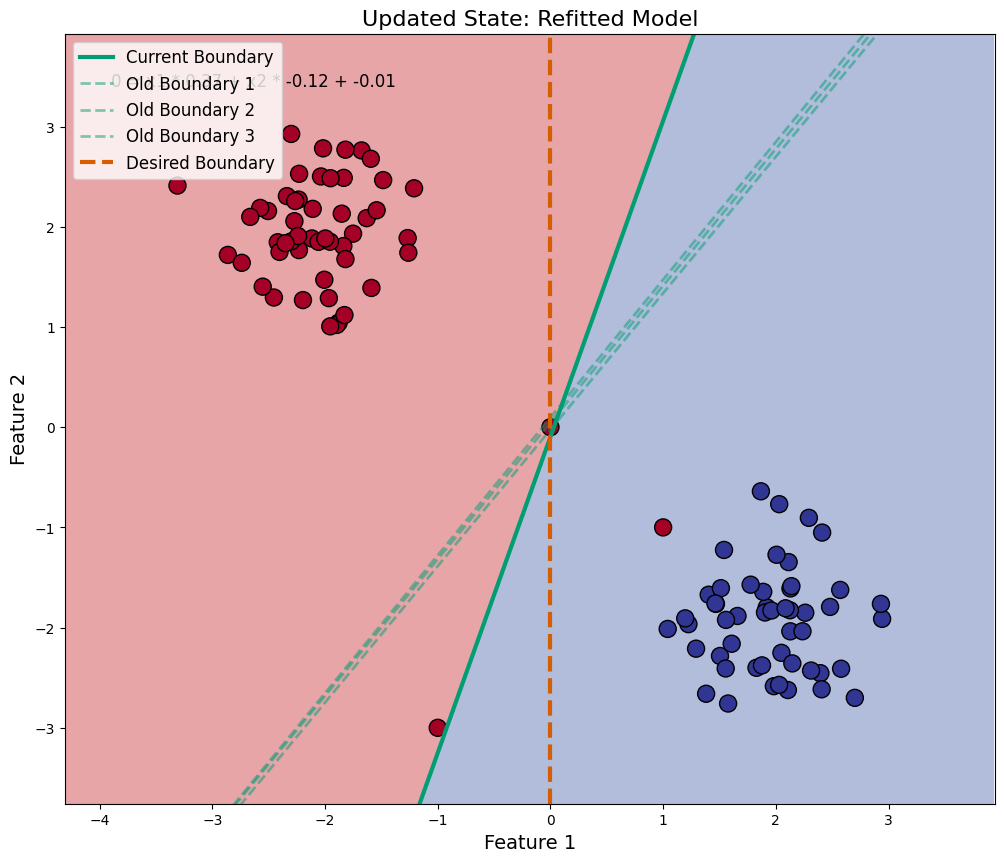

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interactive_output, FloatSlider, IntSlider, Button, VBox, HBox
from IPython.display import display, clear_output
%matplotlib inline

# Use a colorblind-friendly palette
import seaborn as sns
colors = sns.color_palette("colorblind")

class LinearClassifier:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        X_bias = np.c_[X, np.ones(X.shape[0])]
        self.w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
        self.b = self.w[-1]
        self.w = self.w[:-1]

    def predict(self, X):
        return np.sign(X @ self.w + self.b)

# Generate sample data with clear separation
np.random.seed(42)
X1 = np.random.randn(50, 2) * 0.5 + np.array([-2, 2])
X2 = np.random.randn(50, 2) * 0.5 + np.array([2, -2])
X_full = np.vstack((X1, X2))
y_full = np.hstack((np.ones(50) * -1, np.ones(50)))

# Create a version with missing middle section
mask = (X_full[:, 0] < 0.5) & (X_full[:, 0] > -0.5)
X = X_full[~mask]
y = y_full[~mask]

# Train linear classifier on data with missing middle section
clf = LinearClassifier()
clf.fit(X, y)

new_points = []
old_boundaries = []

# Set fixed plot limits
x_min, x_max = X_full[:, 0].min() - 1, X_full[:, 0].max() + 1
y_min, y_max = X_full[:, 1].min() - 1, X_full[:, 1].max() + 1

def update_plot(X, y, model, title, show_full_data=False, new_points=None):
    global old_boundaries, x_min, x_max, y_min, y_max
    plt.figure(figsize=(12, 10))

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    if show_full_data:
        plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, cmap=plt.cm.RdYlBu,
                    edgecolor='black', alpha=0.2, s=100)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                edgecolor='black', s=150)

    if new_points:
        new_points_array = np.array(new_points)
        plt.scatter(new_points_array[:, 0], new_points_array[:, 1],
                    c=new_points_array[:, 2], cmap=plt.cm.RdYlBu,
                    edgecolor='black', s=200, marker='*')

    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.title(title, fontsize=16)

    # Plot the learned decision boundary line
    w = model.w
    b = model.b
    x_boundary = np.array([x_min, x_max])
    y_boundary = -(w[0] * x_boundary + b) / w[1]
    plt.plot(x_boundary, y_boundary, color=colors[2], linewidth=3, label='Current Boundary')

    # Plot old decision boundaries
    for i, (old_w, old_b) in enumerate(old_boundaries):
        y_old_boundary = -(old_w[0] * x_boundary + old_b) / old_w[1]
        plt.plot(x_boundary, y_old_boundary, color=colors[2], linestyle='--',
                 linewidth=2, alpha=0.5, label=f'Old Boundary {i+1}')

    # Plot the "true" decision boundary
    plt.axvline(x=0, color=colors[3], linestyle='--', linewidth=3, label='Desired Boundary')

    plt.legend(fontsize=12)
    plt.text(0.05, 0.95, f'0 = x1 * {w[0]:.2f} + x2 * {w[1]:.2f} + {b:.2f}',
             transform=plt.gca().transAxes, verticalalignment='top', fontsize=12)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()

# Plot initial state with missing data
update_plot(X, y, clf, "Initial State: Missing Training Data")

def add_point(x1, x2, label):
    global new_points, clf, X, y
    new_points.append([x1, x2, -1 if label == 0 else 1])  # Convert label to -1 or 1
    clear_output(wait=True)
    update_plot(X, y, clf, "Updated State: Added Training Data",
                show_full_data=True, new_points=new_points)
    display(ui)

def refit_model(b):
    global X, y, clf, new_points, old_boundaries
    if new_points:
        old_boundaries.append((clf.w, clf.b))
        X_new = np.vstack([X, np.array(new_points)[:, :2]])
        y_new = np.hstack([y, np.array(new_points)[:, 2]])
        clf.fit(X_new, y_new)
        X, y = X_new, y_new
        clear_output(wait=True)
        update_plot(X, y, clf, "Updated State: Refitted Model", show_full_data=True)
        display(ui)
        new_points = []

x1_slider = FloatSlider(min=-4, max=4, step=0.1, description='x1')
x2_slider = FloatSlider(min=-4, max=4, step=0.1, description='x2')
label_slider = IntSlider(min=0, max=1, step=1, description='Label')
add_button = Button(description="Add Point")
refit_button = Button(description="Refit Model")

add_button.on_click(lambda b: add_point(x1_slider.value, x2_slider.value, label_slider.value))
refit_button.on_click(refit_model)

ui = VBox([HBox([x1_slider, x2_slider, label_slider]), HBox([add_button, refit_button])])

print("Use the sliders to set coordinates and label, then click 'Add Point' to add points.")
print("Click 'Refit Model' to update the decision boundary with the new points.")
display(ui)

Add points to the chart above [red (class 0) and blue (class 1) labels] to get the decision boundary line (solid green line) to be as close to the "Desired boundary" (dotted orange line) as possible. What you are adding is the poisoned training points which are supposed to move the decision boundary to the desired location.

# Model Inversion

Model Inversion takes place when the attacker would like to determine what the input is for a known output label.

With linear models there are only two labels.

## What is a way that an attacker could figure out the valid inputs for a known label?

#Model Inference (Special case of Model Stealing)

Is there anything we can learn from the behavior of the model to determine any characteristics of the models such as the hyperparameter values, number of layers, if they are using Dropout, etc.

With linear models you can to learn the weights. If you learn the weights of the linear model then you can steal the model

It may be difficult to learn the exact weight values for linear classification but it is possible for linear regression.

Think about the housing price predictor.

##How can you use targeted input values to determine the value of the weights in the formula:

predicted_price = 200000x1 + 200000x2 + 200000

Another way of writing the formula above is:

predicted_price = w1 * x1 + w2 * x2 + bias

We want to learn w1, w2 and bias.

We can give the model x1 and x2 as the number of bedrooms and number of bathrooms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatText, Button, VBox, HBox, Output
from IPython.display import display, clear_output

class LinearModel:
    def __init__(self, w1, w2, b):
        self.w1 = w1
        self.w2 = w2
        self.b = b

    def predict(self, X):
        return X[:, 0] * self.w1 + X[:, 1] * self.w2 + self.b

# Create a "true" model (which we'll pretend we don't know)
true_model = LinearModel(200000, 150000, 50000)

def query_model(bedrooms, bathrooms):
    X = np.array([[bedrooms, bathrooms]])
    return true_model.predict(X)[0]

# Initialize inferred parameters
inferred_b = None
inferred_w1 = None
inferred_w2 = None

output = Output()

@output.capture()
def infer_parameters():
    global inferred_b, inferred_w1, inferred_w2

    # Step 1: Infer the bias
    inferred_b = query_model(0, 0)
    print(f"Inferred bias: ${inferred_b:.2f}")

    # Step 2: Infer w1 (weight for bedrooms)
    price_with_one_bedroom = query_model(1, 0)
    inferred_w1 = price_with_one_bedroom - inferred_b
    print(f"Inferred weight for bedrooms: ${inferred_w1:.2f}")

    # Step 3: Infer w2 (weight for bathrooms)
    price_with_one_bathroom = query_model(0, 1)
    inferred_w2 = price_with_one_bathroom - inferred_b
    print(f"Inferred weight for bathrooms: ${inferred_w2:.2f}")

    print("\nInferred model: Price = {:.2f} * bedrooms + {:.2f} * bathrooms + {:.2f}".format(
        inferred_w1, inferred_w2, inferred_b))
    print("\nTrue model: Price = {:.2f} * bedrooms + {:.2f} * bathrooms + {:.2f}".format(
        true_model.w1, true_model.w2, true_model.b))

bedrooms_input = FloatText(value=0, description='Bedrooms:')
bathrooms_input = FloatText(value=0, description='Bathrooms:')
query_button = Button(description="Query Model")
infer_button = Button(description="Infer Parameters")

def on_query_button_clicked(b):
    with output:
        clear_output()
        price = query_model(bedrooms_input.value, bathrooms_input.value)
        print(f"Price for {bedrooms_input.value} bedrooms and {bathrooms_input.value} bathrooms: ${price:.2f}")

query_button.on_click(on_query_button_clicked)
infer_button.on_click(lambda b: infer_parameters())

ui = VBox([
    HBox([bedrooms_input, bathrooms_input]),
    HBox([query_button, infer_button]),
    output
])

print("Use the inputs to query the model, then click 'Infer Parameters' to see the inference process.")
display(ui)

Use the inputs to query the model, then click 'Infer Parameters' to see the inference process.


# Training Dataset Leakage

Are there any signs that the inputs provided to the model were part of the training set. One way to identify the use of trainging data as inputs to the model is when output confidence scores are significantly higher for input values when providing training data as input to the model?

Look at the first two plots.

You provide inputs and it either tells you that the output is one class or another.

With linear regression the output is a housing price. Is there a way that the model can leak the training data?


Sample of our 'training' data:
   Size (sq ft)  Bedrooms   Price
0          2382         1  387495
1          1700         5  435191
2          1989         4  392471
3          2620         4  507245
4          2433         2  415608

Model coefficients:
Price = $95774 + $101.59 * Size + $25318 * Bedrooms

Predicted price for a 1500 sq ft house with 3 bedrooms: $324111
But we can't know if this exact house was in the original dataset.


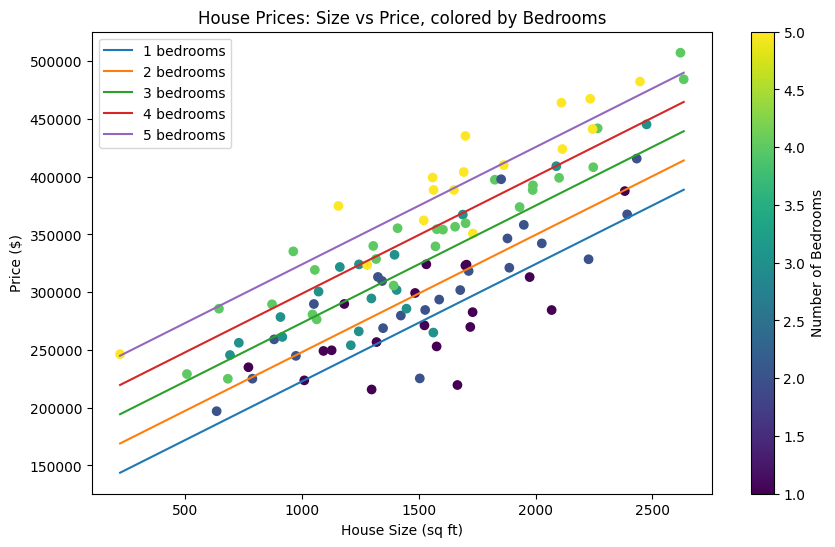

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some realistic house data
np.random.seed(0)
n_houses = 100
size = np.random.normal(1500, 500, n_houses).astype(int)  # house sizes in sq ft
bedrooms = np.random.randint(1, 6, n_houses)  # number of bedrooms
price = 100000 + 100 * size + 25000 * bedrooms + np.random.normal(0, 25000, n_houses)

# Create a dataframe for easier viewing
df = pd.DataFrame({
    'Size (sq ft)': size,
    'Bedrooms': bedrooms,
    'Price': price.astype(int)
})

print("Sample of our 'training' data:")
print(df.head())

# Train a linear model
model = LinearRegression()
X = df[['Size (sq ft)', 'Bedrooms']]
y = df['Price']
model.fit(X, y)

print("\nModel coefficients:")
print(f"Price = ${model.intercept_:.0f} + ${model.coef_[0]:.2f} * Size + ${model.coef_[1]:.0f} * Bedrooms")

# Try to "recover" a data point
query_size = 1500
query_bedrooms = 3
query_df = pd.DataFrame({'Size (sq ft)': [query_size], 'Bedrooms': [query_bedrooms]})
predicted_price = model.predict(query_df)[0]

print(f"\nPredicted price for a {query_size} sq ft house with {query_bedrooms} bedrooms: ${predicted_price:.0f}")
print("But we can't know if this exact house was in the original dataset.")

# Visualize the data and model
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Size (sq ft)'], df['Price'], c=df['Bedrooms'], cmap='viridis')
plt.colorbar(scatter, label='Number of Bedrooms')

sizes = np.linspace(df['Size (sq ft)'].min(), df['Size (sq ft)'].max(), 100)
for bedrooms in range(1, 6):
    prices_df = pd.DataFrame({'Size (sq ft)': sizes, 'Bedrooms': np.full(100, bedrooms)})
    prices = model.predict(prices_df)
    plt.plot(sizes, prices, label=f'{bedrooms} bedrooms')

plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('House Prices: Size vs Price, colored by Bedrooms')
plt.legend()
plt.show()

You can use a linear model to get predictions but there is no direct indicator (like a confidence value) which can differentiate the different predictions.